# Lecture 7
Analyzing neural data from neuropixel experiment

Adapted from neuromatch academy material https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

/Users/julwang/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/julwang/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/julwang/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
    print('Could not download data')
else:
    spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']

In [3]:
def plot_isis(single_neuron_isis):
  plt.hist(single_neuron_isis, bins=50, histtype="stepfilled")
  plt.axvline(single_neuron_isis.mean(), color="orange", label="Mean ISI")
  plt.xlabel("ISI duration (s)")
  plt.ylabel("Number of spikes")
  plt.legend()

In [6]:
type(spike_times)

numpy.ndarray

In [7]:
spike_times

(734,)

In [10]:
spike_times[0]

array([8.1489998e-01, 1.4822467e+01, 2.4964600e+01, 2.5143600e+01,
       3.8870899e+01, 5.0820801e+01, 5.4806866e+01, 5.9511833e+01,
       8.0470367e+01, 1.2709637e+02, 1.6678714e+02, 1.7524760e+02,
       1.7728830e+02, 1.7831754e+02, 2.3178033e+02, 2.4066676e+02,
       2.7128897e+02, 3.0554150e+02, 3.0564987e+02, 3.1116019e+02,
       3.1275296e+02, 3.1846918e+02, 3.2280109e+02, 3.2485114e+02,
       3.5686102e+02, 3.5699719e+02, 3.7701962e+02, 3.8818140e+02,
       3.9037332e+02, 4.3421207e+02, 4.4229883e+02, 4.7392587e+02,
       4.8475021e+02, 5.0332483e+02, 5.0333578e+02, 5.0336313e+02,
       5.0341571e+02, 5.3048364e+02, 5.7414423e+02, 5.8498682e+02,
       5.8690369e+02, 5.9334210e+02, 6.1483112e+02, 6.5422388e+02,
       6.5453082e+02, 6.5481042e+02, 7.1913885e+02, 7.3967511e+02,
       7.4461981e+02, 7.4536530e+02, 7.5823090e+02, 7.5842230e+02,
       7.6530389e+02, 7.7090735e+02, 7.9484314e+02, 8.0276129e+02,
       8.0647791e+02, 8.0952216e+02, 8.1770441e+02, 8.3288147e

In [11]:
spike_times[0].shape

(826,)

In [12]:
i_neurons = [0, 321]
i_print = slice(0, 5)

for i in i_neurons:
  print(
    "Neuron {}:".format(i),
    spike_times[i].dtype,
    spike_times[i][i_print],
    "\n",
    sep="\n"
  )

Neuron 0:
float32
[ 0.8149   14.822467 24.9646   25.1436   38.8709  ]


Neuron 321:
float32
[1.0698667 1.1536334 1.2403667 1.7072    1.799    ]




In [13]:
n_neurons = len(spike_times)
total_spikes_per_neuron = [len(spike_times_i) for spike_times_i in spike_times]

print(f"Number of neurons: {n_neurons}")
print(f"Number of spikes for first five neurons: {total_spikes_per_neuron[:5]}")

Number of neurons: 734
Number of spikes for first five neurons: [826, 2818, 3953, 646, 1115]


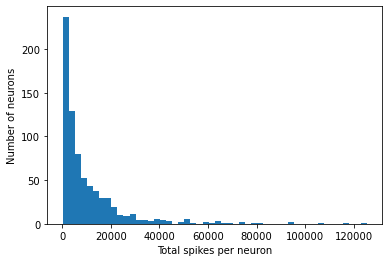

In [14]:
plt.hist(total_spikes_per_neuron, bins=50, histtype="stepfilled")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons");

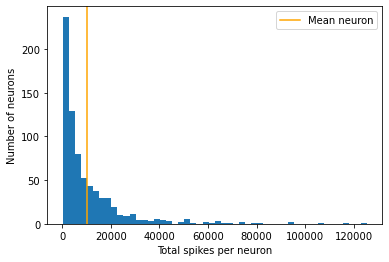

In [16]:
mean_spike_count = np.mean(total_spikes_per_neuron)
plt.hist(total_spikes_per_neuron, bins=50, histtype="stepfilled")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.legend();

In [ ]:
# Exercise: Add in a line for the median spike count

## Plotting rasters

In [45]:
spike_times_flat = np.concatenate(spike_times)
print(np.min(spike_times_flat))
print(np.max(spike_times_flat))

0.0033666666
2702.643


In [22]:
def restrict_spike_times(spike_times, interval):
  """Given a spike_time dataset, restrict to spikes within given interval.

  Args:
    spike_times (sequence of np.ndarray): List or array of arrays,
      each inner array has spike times for a single neuron.
    interval (tuple): Min, max time values; keep min <= t < max.

  Returns:
    np.ndarray: like `spike_times`, but only within `interval`
  """
  interval_spike_times = []
  for spikes in spike_times:
    interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
    interval_spike_times.append(spikes[interval_mask])
  return np.array(interval_spike_times, object)

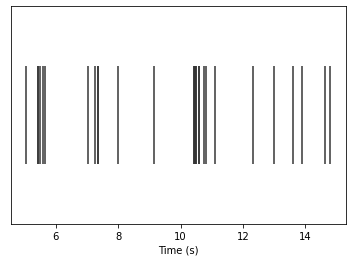

In [24]:
interval_spike_times = restrict_spike_times(spike_times, (5, 15))
neuron_idx = 1
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

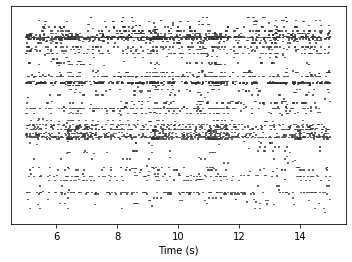

In [25]:
neuron_idx = np.arange(0, len(spike_times), 5)
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

(array([ 1.,  3.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,
         2.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  2.,  4.,  1.,  0.,
         2.,  1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  4.,  0.,
         1.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  1.,  1.,  2.,  3.,  1.,  0.,  3.,  2.,  3.,  2.,  1.,  1.,
         1.,  1.,  1.,  0.,  1.,  3.,  4.,  1.,  0.,  0.,  0.,  6.,  2.,
         0.,  2.,  0.,  0.,  2.,  6.,  0., 18.,  6.,  7.,  4.,  6.,  6.,
        12., 17.,  3., 11.,  9.,  5., 13., 17.,  3.,  1., 15., 13.,  2.,
        10.,  0.,  6.,  2.,  6.,  1.,  0.,  1.,  3.,  2.,  2.,  3., 15.,
         0.,  2., 15.,  3.,  7., 16.,  1.,  0.,  3.,  2.,  1.,  2.,  2.,
         3.,  1.,  1.,  4., 10.,  2.,  1., 53., 15.,  9.,  6.,  9.,  2.,
         9., 12., 15.,  6., 11.,  1.,  2.,  2.,  9.,  7.,  9.,  4.,  5.,
         1., 18., 12., 16.,  5.,  3.,  1.,  1.,  5.,  1.,  5.,  8.,  1.,
         1.,  3.,  3.,  9.,  6.,  8.,  0.,  1., 12.

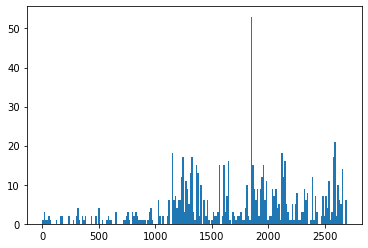

In [43]:
n_bins = 200
neuron_idx = 0
plt.hist(spike_times[neuron_idx], bins=n_bins)

In [44]:
# What is the average firing rate?
# What is the average firing rate from time 100 to 150?

In [48]:
bins = np.arange(0, 2710, 10)
psths = np.asarray([np.histogram(spike_times[i], bins=bins)[0] for i in range(spike_times.shape[0])])

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
neurons_decomp = pca.fit_transform(psths)

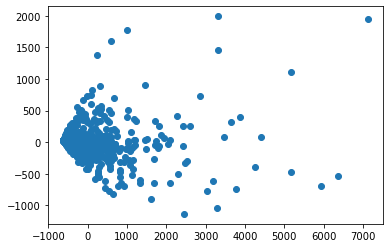

In [61]:
plt.scatter(x=neurons_decomp[:, 0], y=neurons_decomp[:, 1])

## Getting trialed spike rates

In [31]:
#@title Data retrieval and loading
import os
import requests
import hashlib

url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    elif hashlib.md5(r.content).hexdigest() != expected_md5:
      print("!!! Data download appears corrupted !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

def load_steinmetz_data(data_fname=fname):

  with np.load(data_fname) as dobj:
    data = dict(**dobj)

  return data

In [32]:
data = load_steinmetz_data()
for key, val in data.items():
  print(key, val.shape)

spikes (276, 691)
choices (276,)


In [62]:
y = data["choices"]
X = data["spikes"]

In [64]:
from sklearn.linear_model import LogisticRegression
# Define the model
log_reg = LogisticRegression(penalty="none")

# Fit it to data
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = log_reg.predict(X)

In [67]:
# TODO: Calculate the accuracy of your linear regression

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8)  # k=8 cross validation